In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
from sklearn import tree

# First step into machine learning beyond classic regression

In [4]:
# Warm Up
R1 = np.array([5,8,9])
R2 = np.array([1,0,20])

Calculate the a) Gini co-efficient and b) entropy for R1. Then, write a function that takes in a normalized vector and outputs the Gini co-efficent and Entropy.

In [136]:
R1_norm = R1 / R1.sum()
R2_norm = R2 / R2.sum()

G = lambda x: 1 - (x**2).sum()
H = lambda x: - (x*np.log(x, where = x!= 0)).sum()

H(R2_norm)

0.19144408195771734

Calculate the weighted sums.

In [138]:
["a"]*3

['a', 'a', 'a']

<Axes: xlabel='True Values', ylabel='Pred Values'>

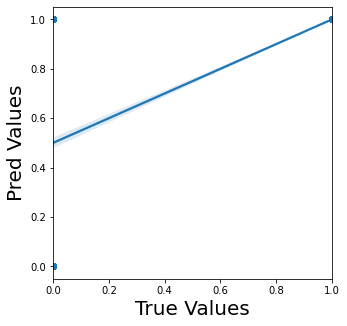

In [139]:
plt.figure(figsize=(5,5,))
xx = [0,1,0]*1000
yy = [0,1,1]*1000

plt.xlabel("True Values", fontsize=20)
plt.ylabel("Pred Values", fontsize=20)

sns.regplot(xx,yy)

# Decision Trees

Here, we will implement once again the titanic dataset.

In [77]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

There are missing values for age. Replace the nans with the median age.

In [78]:
# Fill missing age values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

Drop the following columns: 'who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive'

In [79]:
# Drop 'deck' and 'embark_town' columns as they have many missing values
titanic.drop(columns=['who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive'], inplace=True)

Using label_encoder, transform the dataset into integer encodings.

In [83]:
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

titanic['sex'] = label_encoder.fit_transform(titanic['sex'])  # Male: 1, Female: 0
titanic['class'] = label_encoder.fit_transform(titanic['class'])  # 1st, 2nd, 3rd -> 0, 1, 2
titanic['alone'] = label_encoder.fit_transform(titanic['alone'])

# Drop unnecessary columns (name, ticket, cabin)
# titanic.drop(columns=['who', 'adult_male', 'fare', 'embarked', 'parch', 'sibsp'], inplace=True)

# Set-up your training by specifying X and y

Use train_test_split to split the data and train.

In [84]:
# Define features (X) and target (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (712, 7), Test set shape: (179, 7)


In [85]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

In [86]:
feature_names = X.columns

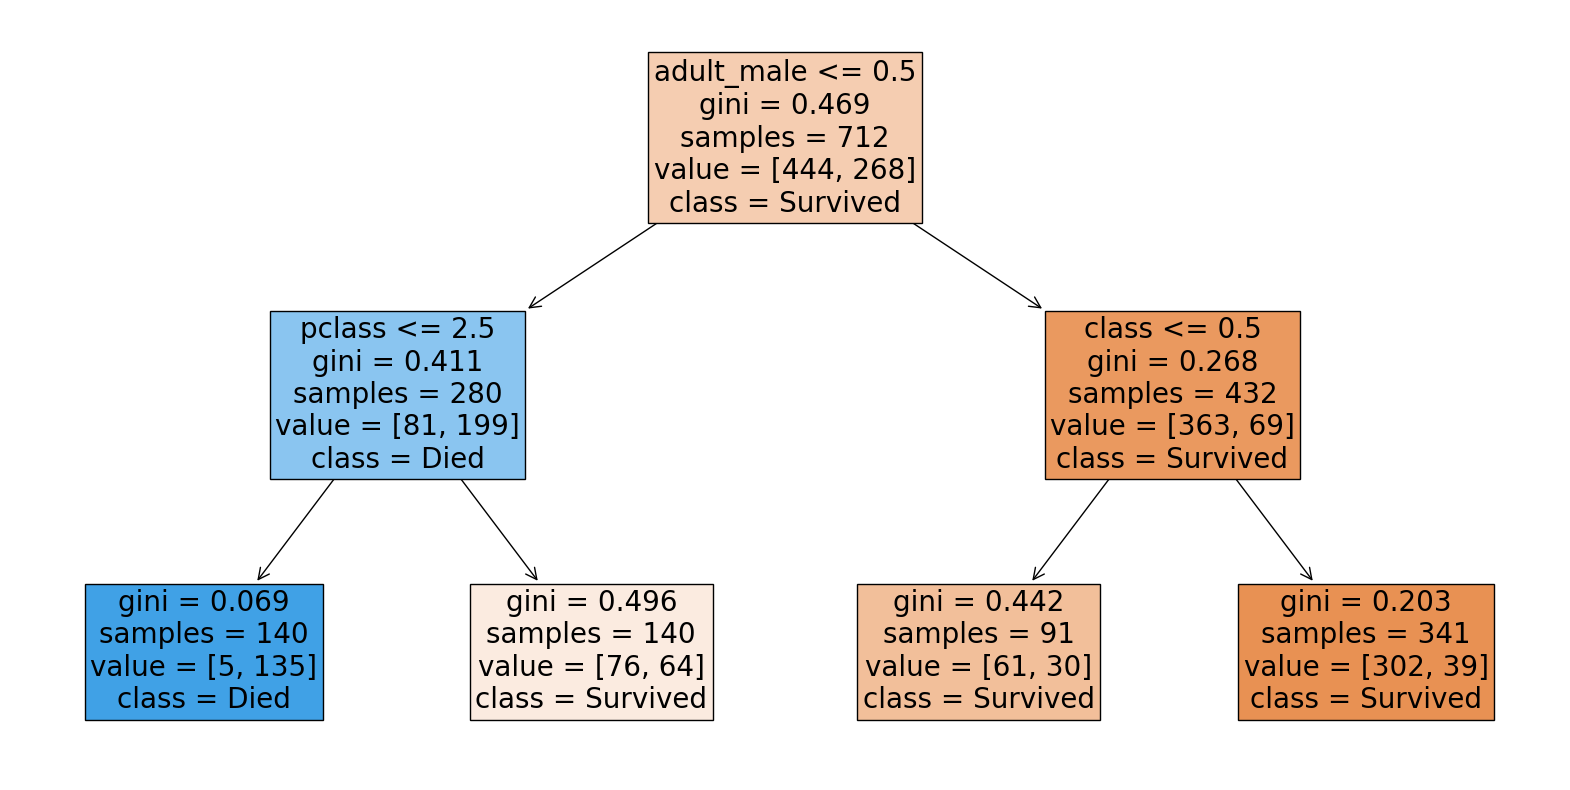

In [87]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
                   feature_names=feature_names,  
                   class_names=["Survived", "Died"],
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

### Evaluating your results
Now that you have your predicted values and actual values, plot a scatter plot and give the R2. What do you see?

<Axes: xlabel='survived'>

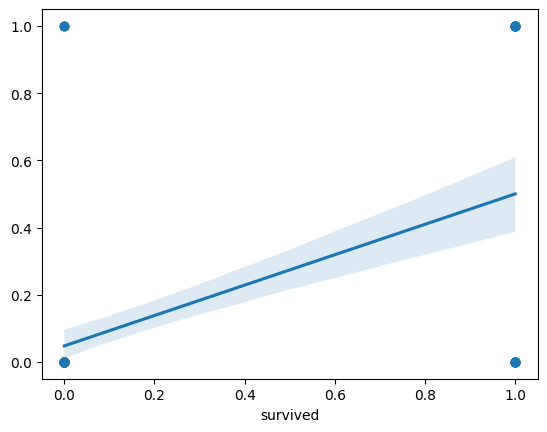

In [65]:
sns.regplot(x=y_test,y=y_pred_dt)

Calculate the accuracy, recall, and precision. Then, use the function confusion_matrix and sns.heatmap to plot a confusion matrix.

Decision Tree Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.71       105
           1       0.60      0.73      0.66        74

    accuracy                           0.69       179
   macro avg       0.69      0.69      0.68       179
weighted avg       0.70      0.69      0.69       179



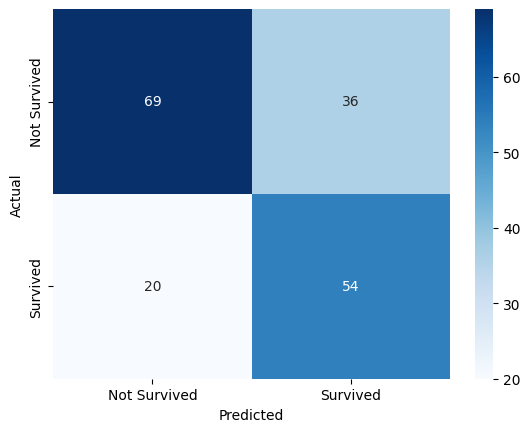

In [75]:
# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot confusion matrix
confusion_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Change the cost criterion from Gini to entropy
Does this change the performance metric?

In [84]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### Hyperparameter tuning: How does performance change with increased max depth?
Write code that increases the max depth from 1 to 5, then plot on one figure how this impacts the accuracy, recall, and precision.

In [141]:
results = []
for i in range(1,6):
    # Create and train the Decision Tree Classifier
    decision_tree = DecisionTreeClassifier(max_depth=i,)
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_dt = decision_tree.predict(X_test)

    # Evaluate the performance
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    
    results.append(accuracy_dt)
    

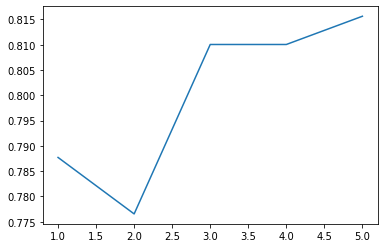

In [142]:
plt.plot(range(1,6),results)

# Random Forest

Use the function RandomForestClassifier to train a classifier. 

Random Forest Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.85      0.76       105
           1       0.69      0.47      0.56        74

    accuracy                           0.69       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.69      0.69      0.68       179



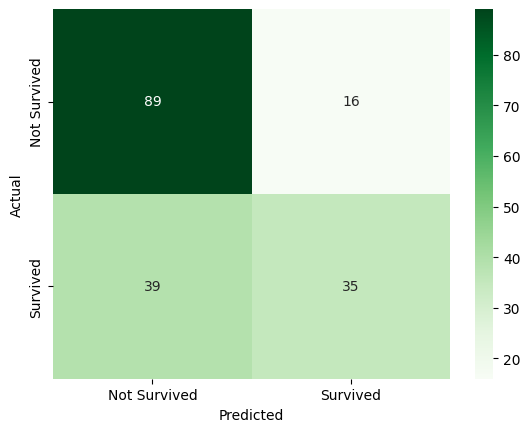

CPU times: user 202 ms, sys: 8.79 ms, total: 211 ms
Wall time: 210 ms


In [76]:
%%time
# Create and train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest
confusion_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

How does this compare to the decision tree?

## Choose 10 values for n_estimators and 10 values for max_depth
#### Plot a heatmap that shows the grid search on these values

In [9]:
def train_one_sample(p):
    
    n_estimators, max_depth = p

    # Create and train the Random Forest Classifier
    random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth= max_depth)
    random_forest.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_rf = random_forest.predict(X_test)

    # Evaluate the performance
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    
    return accuracy_rf

In [10]:
from itertools import product

In [24]:
trees = np.arange(0,101,5)[1:]
depth = np.arange(0,11,1)[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
trees = np.arange(0,101,5)[1:]
depth = np.arange(0,11,1)[1:]
params = list( product(trees, depth)) 

In [27]:
%%time
acc_results = []
for p in params:
    acc_results.append( train_one_sample(p)  )
    


CPU times: user 8.36 s, sys: 33.1 ms, total: 8.4 s
Wall time: 8.4 s


In [28]:
ar = pd.DataFrame(params, columns = ["n_estimators", "depth"])
ar["acc"] = acc_results

<Axes: xlabel='depth', ylabel='n_estimators'>

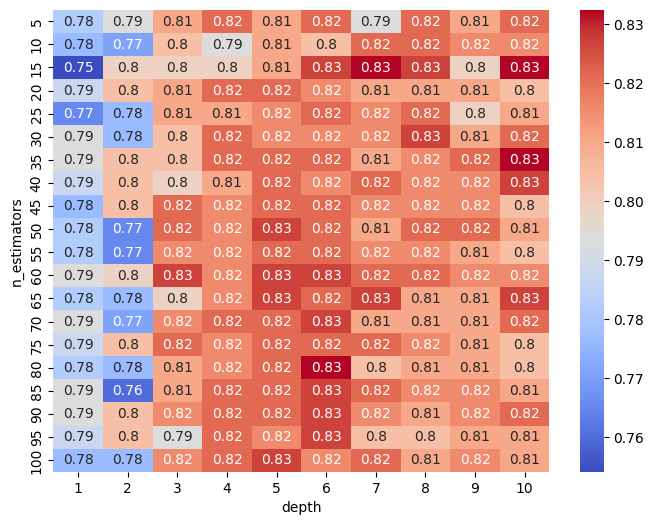

In [29]:
# Step 2: Pivot the DataFrame
ar = ar.pivot_table(values='acc', index='n_estimators', columns='depth')

# Step 3: Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ar, annot=True, cmap='coolwarm')

# Larger data

In [64]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
    'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
    'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
    'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
    'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
    'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
    'Cover_Type'
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)


In [65]:
# Define the features (X) and the target (y)
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (464809, 54), Test set shape: (116203, 54)


In [68]:
%%time

# Train the Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_training_time = time.time() - start_time

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Training Time: {dt_training_time:.2f} seconds")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9390
Decision Tree Training Time: 5.03 seconds
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.85      0.81      0.83       526
           5       0.84      0.83      0.83      1995
           6       0.88      0.89      0.88      3489
           7       0.94      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



In [69]:
%%time

# Train the Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Training Time: {rf_training_time:.2f} seconds")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9552
Random Forest Training Time: 67.18 seconds
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203

